## COMPSCI 762 Assignment 2

In [1]:
import os

import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

from scipy.stats import pearsonr
from autorank import autorank, create_report, plot_stats, latex_table

## Task 1

#### Coding

In [2]:
random_state = 1234
np.random.seed(random_state)

# set the path for the dataset
PATH_DATA = os.path.join('data', 'data_A2.csv')

# read data
X = pd.read_csv(PATH_DATA, sep=',', header=None)
print(X.shape)
print(X.head(10))

(1000, 100)
         0         1         2         3         4         5         6   \
0       NaN -0.176595 -4.126644 -2.390884 -1.366659 -0.460177  1.521421   
1  0.267386       NaN -1.820798  1.540020  1.656770  0.447912  6.484100   
2  2.946515 -1.594067       NaN  0.403844 -1.733342  0.274193  2.960081   
3 -4.581082 -0.001274  1.197022       NaN -0.416290 -1.941236  0.290991   
4 -2.123360 -0.266587  1.781999 -0.039342       NaN  0.895856  3.756880   
5  6.513298  0.601715 -0.898230  5.975793  0.930283       NaN  7.071059   
6  1.011204 -1.530166 -2.803067 -8.704202 -4.348667  0.136529       NaN   
7 -0.677415 -3.604567  6.070001 -2.669360 -2.099381 -0.151524  1.408160   
8 -8.645755  1.398383  1.268300 -4.617768 -1.832807 -0.509382 -3.042679   
9  2.099264  0.008204  4.042282  1.374465 -0.358134  0.183255  1.347493   

         7         8         9   ...        90        91        92        93  \
0  5.328470 -2.919639 -6.216557  ... -1.919015 -1.603442 -0.867395 -1.825951   
1 

In [3]:
# set the path for the label dataset
PATH_LABEL = os.path.join('data', 'labels_A2.csv')

# read label data 
y = pd.read_csv(PATH_LABEL, sep=',', header=None)

print(y.head())
print(y.shape)

     0
0  1.0
1  0.0
2  0.0
3  0.0
4  1.0
(1000, 1)


In [4]:
# Use the most probable value
imputer = IterativeImputer(missing_values=np.nan, max_iter=50, initial_strategy='median', random_state=random_state)
imputer.fit(X)
X_filled = imputer.transform(X)
X_filled_df = DataFrame(X_filled)
print(X_filled_df)

           0         1         2         3         4         5         6   \
0   -1.136033 -0.176595 -4.126644 -2.390884 -1.366659 -0.460177  1.521421   
1    0.267386  0.013437 -1.820798  1.540020  1.656770  0.447912  6.484100   
2    2.946515 -1.594067  1.858665  0.403844 -1.733342  0.274193  2.960081   
3   -4.581082 -0.001274  1.197022 -2.944502 -0.416290 -1.941236  0.290991   
4   -2.123360 -0.266587  1.781999 -0.039342  2.670569  0.895856  3.756880   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.318539  0.539550 -0.144831  1.402720  2.018928 -0.033435 -0.763604   
996 -5.843779  0.341371 -0.612153 -0.209380 -1.398469  0.550250 -1.623379   
997  3.406411  0.321762  0.286231  2.116516 -1.548059 -1.626494  3.787104   
998 -2.167186  0.627939 -0.993588  0.902711 -1.024744 -0.416702  3.966772   
999 -3.621659 -1.628561 -1.991653  3.852027  1.636139 -0.283941  0.050966   

           7         8         9   ...        90        91        92  \
0  

#### Paragraph

There are 1000 rows and 100 columns in the X dataset where the size of the data is relatively small. After looking at the top 10 rows in the X dataset, I noticed the data are numerical values, and there is at least one missing value in every row and every column. The data is missing at random. Depending on this information, I choose to fill the missing data by using the most probable value imputation strategy. This strategy initially fills the missing value with *`median`* value and then training multiple default `BayesianRidge` regression values and using each attribute with missing value as output and training multiple models using the rest of the features. Training maximum 50 iterations to it convert. As the size of the dataset is not large, this imputation does not take too much time.

## Task 2

#### Coding

In [5]:
def test_selection(sel):
    sel.fit(X_filled, np.ravel(y))
    print(X_filled_df.columns[sel.get_support()].to_list())
    
test_selection(SelectKBest(f_classif,k=10))

X_clean = SelectKBest(f_classif, k = 10).fit_transform(X_filled, np.ravel(y))
print(X_clean)

[0, 8, 18, 46, 60, 65, 69, 77, 78, 97]
[[-1.13603271 -2.91963929 -0.21530877 ... -0.21530877 -0.72289957
  -0.82330291]
 [ 0.26738568 -1.12961117 -2.24550537 ... -2.24550537  2.49297253
   1.10567555]
 [ 2.94651515  0.39332371 -3.41648958 ... -3.41648958 -0.24785755
   3.42263394]
 ...
 [ 3.40641099 -2.11387845 -6.26495036 ... -6.26495036  1.43568029
   4.34526771]
 [-2.16718563 -2.39433995  1.67715653 ...  1.67715653 -1.98683152
  -3.23150977]
 [-3.62165864 -2.0445179   3.11045461 ...  3.11045461  2.61232767
   0.07252107]]


#### Paragraph

I found the 10 most important features of the cleaned dataset using the univariate feature selection, which selects the best features based on univariate statistical tests. By looking at the values in the label *y*, there are only two values, 0 and 1, which means it is a discrete class label. Therefore, it is a binary classification task. `f_classif` is a scoring function that calculates ANOVA F-value between label and features for classification tasks and the `SelectKBest` function with hyper-parameter k=10, which removes all the other features but the highest top 10 scoring features. I think these top 10 scoring features are important because the F-value for each feature is calculated by the mean divide by the variance. The higher the F-value means, the less the label values are overlapping, which is easier to build a good model. Therefore, by selecting the 10 best features, it means these are the 10 features that are most important to build a good model.

## Task 3

#### Coding

In [6]:
scores_list1 = []

params = [{
    'max_depth': np.arange(2, 100), 
    #'criterion': ['entropy']
}]

# set 100 random seeds
seeds = np.random.randint(1000,9999,100)

for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, np.ravel(y), test_size = 0.2, random_state=seeds[iteration])
    score_list = []
    
    # Random Forest
    model1 = RandomForestClassifier()
    score1 = model1.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score1)

    # Unpruned Decision Tree
    model2 = DecisionTreeClassifier()
    score2 = model2.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score2)

    # Pruned Decision Tree
    #find the best max_depth by using GridSearchCV
    grid_search = GridSearchCV(model2, params, cv = 5)
    grid_search.fit(X_train, y_train)
    model3 = grid_search.best_estimator_
    score3 = model3.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score3)

    # Decision Stump
    model4 = DecisionTreeClassifier(max_depth=1)
    score4 = model4.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score4)

    scores_list1.append(score_list)

RankResult(rankdf=
                 meanrank     mean       std  ci_lower  ci_upper effect_size  \
Randomforest        1.250  0.66930  0.030699  0.663666  0.674934         0.0   
Pruned DT           2.140  0.63875  0.028984  0.633116  0.644384    1.023313   
Unpruned DT         3.185  0.60505  0.031555  0.599416  0.610684    2.063933   
Decision Stumps     3.425  0.59455  0.032186  0.588916  0.600184    2.376707   

                  magnitude  
Randomforest     negligible  
Pruned DT             large  
Unpruned DT           large  
Decision Stumps       large  
pvalue=7.096463862525304e-66
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.2686068117618561, 0.06844109296798706, 0.7191048860549927, 0.03483361378312111]
homoscedastic=True
pval_homogeneity=0.7513574038988919
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effect_size=cohen_d)


/Users/yezi/opt/anaconda3/envs/venv/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

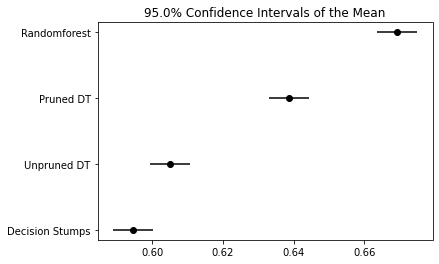

In [7]:
# convert the score list to a dataframe
df1 = DataFrame(scores_list1,columns=['Randomforest', 'Unpruned DT', 'Pruned DT', 'Decision Stumps'])

# using autorank to compare the algorithms
result = autorank(df1)
print(result)
plot_stats(result)

#### Paragraph

The plot shows 95.0% confidence intervals of the mean for the four algorithms. An algorithm is considered to be statistically significantly better than others if the confidence intervals are not overlapping. Therefore, the **Random Forest** is statistically significantly better than the other three algorithms, and the **Pruned Decision Tree** is statistically significantly better than *Unpruned Decision Tree* and *Decision Stumps*. **Unpruned Decision Tree** and **Decision Stumps** are the worst methods for this clean dataset. **Unpruned Decision Tree** is a decision tree with the full size, and some parts of the tree do not provide power to classify instances, while **Pruned Decision Tree** pruned the unpowerful part of the tree. Therefore, the unpruned decision tree leads to some likelihoods of overfitting the training data and results in a low accuracy score on the test set. **Decision Stumps** is an algorithm that builds a prediction model based only on the value of a single input feature that fits the training data poor and easily leads to an underfitting model with high bias and low variance and results in a low accuracy score on the test set.

## Task 4

#### Coding

In [8]:
# additive normal noise
noise = np.random.normal(0, 0.2, np.shape(X_clean))
# add 20% normal additive noise to the features
X_noise = X_clean + np.multiply(noise, np.average(X_clean, axis = 0))

scores_list2 = []

params = [{
    'max_depth': np.arange(2, 100), 
    #'criterion': ['entropy']
}]

for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_noise, np.ravel(y), test_size = 0.2, random_state=seeds[iteration])
    score_list = []
    
    # Random Forest
    model1 = RandomForestClassifier()
    score1 = model1.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score1)

    # Unpruned Decision Tree
    model2 = DecisionTreeClassifier()
    score2 = model2.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score2)

    # Pruned Decision Tree
    #find the best max_depth by using GridSearchCV
    grid_search = GridSearchCV(model2, params, cv = 5)
    grid_search.fit(X_train, y_train)
    model3 = grid_search.best_estimator_
    score3 = model3.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score3)

    # Decision Stump
    model4 = DecisionTreeClassifier(max_depth=1)
    score4 = model4.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score4)

    scores_list2.append(score_list)

RankResult(rankdf=
                  meanrank     mean       std  ci_lower  ci_upper effect_size  \
ARandomforest        1.890  0.67120  0.031084  0.664183  0.678217         0.0   
Randomforest         2.020  0.66930  0.030699  0.662283  0.676317    0.061504   
Pruned DT            3.935  0.63875  0.028984  0.631733  0.645767    1.079776   
APruned DT           4.045  0.63665  0.033560  0.629633  0.643667    1.068142   
AUnpruned DT         5.375  0.61565  0.038715  0.608633  0.622667    1.582294   
Unpruned DT          6.015  0.60505  0.031555  0.598033  0.612067    2.112046   
ADecision Stumps     6.060  0.60055  0.033521  0.593533  0.607567    2.185565   
Decision Stumps      6.660  0.59455  0.032186  0.587533  0.601567    2.422597   

                   magnitude  
ARandomforest     negligible  
Randomforest      negligible  
Pruned DT              large  
APruned DT             large  
AUnpruned DT           large  
Unpruned DT            large  
ADecision Stumps       large  
Dec

/Users/yezi/opt/anaconda3/envs/venv/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

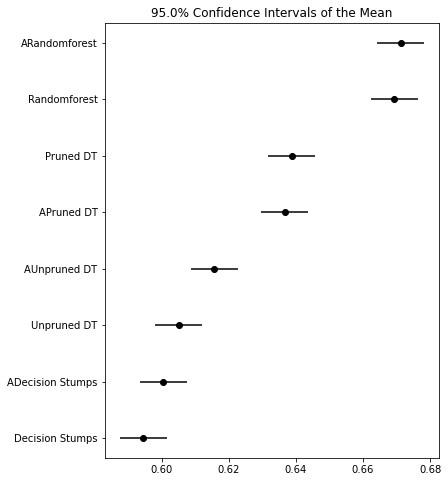

In [9]:
# convert the score list to a dataframe
df2 = DataFrame(scores_list2, columns=['ARandomforest', 'AUnpruned DT', 'APruned DT', 'ADecision Stumps'])
comb_df = pd.concat([df1, df2], axis=1)

# using autorank to compare the algorithms
result = autorank(comb_df)
print(result)
plot_stats(result)

#### Paragraph

I combine the result data frames from Task 4 and Task 3 together and using `autorank` to compare these classifiers. The classifiers from Task 4 are named with an 'A' at the head denotes adding the normal additive noise. From the plot of the result, it shows adding the normal additive noise would not lead to any change in the mean rank order of the four classifiers, and no classifiers are performing significantly worse or better on the noise dataset than on the clean dataset as there is overlap between each pair of the classifier (ARandomforest and Randomforest, APruned DT and Pruned DT, AUnpruned DT and Unpruned DT, ADecision Stumps and Decision Stumps). The **Randomforest**, deals well with noisy data because it constructs each decision tree by resampling the original training dataset with replacement and selecting a random subset of predictive variables at each node to grow the tree, which may avoid the noise data. **Pruned Decision Tree** has pruned the unuseful subtrees, which avoid growing the tree too deep down to cover the noise data. However, **Unpruned Decision Tree** has some risk to grow deep down to cover the noise data, and that's why the difference between the rank scores of Unpruned DT for clean dataset and the noisy dataset is biggest in the four classifiers but still not significant. **Decision Stumps** is a one depth tree that also does not affect too much by noisy data. 

## Task 5

#### Coding

In [10]:
## multiplicative normal noise
noise = np.random.normal(1, 0.2, np.shape(X_clean))
X_noise = np.multiply(X_clean, noise)

scores_list3 = []

params = [{
    'max_depth': np.arange(2, 100), 
    #'criterion': ['entropy']
}]

for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_noise, np.ravel(y), test_size = 0.2, random_state=seeds[iteration])
    score_list = []
    
    # Random Forest
    model1 = RandomForestClassifier()
    score1 = model1.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score1)

    # Unpruned Decision Tree
    model2 = DecisionTreeClassifier()
    score2 = model2.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score2)

    # Pruned Decision Tree
    #find the best max_depth by using GridSearchCV
    grid_search = GridSearchCV(model2, params, cv = 5)
    grid_search.fit(X_train, y_train)
    model3 = grid_search.best_estimator_
    score3 = model3.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score3)

    # Decision Stump
    model4 = DecisionTreeClassifier(max_depth=1)
    score4 = model4.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score4)

    scores_list3.append(score_list)

RankResult(rankdf=
                  meanrank  median       mad ci_lower ci_upper effect_size  \
Randomforest         2.020   0.670  0.029652     0.66    0.685         0.0   
MRandomforest        2.025   0.670  0.029652    0.655    0.685         0.0   
MPruned DT           3.585   0.635  0.029652    0.625     0.66    1.180359   
Pruned DT            3.715   0.640  0.029652    0.625     0.65    1.011736   
Unpruned DT          5.770   0.605  0.037065    0.585     0.62    1.936611   
MUnpruned DT         6.015   0.600  0.033359     0.58    0.615    2.218018   
Decision Stumps      6.230   0.595  0.029652    0.585     0.61     2.52934   
MDecision Stumps     6.640   0.595  0.029652     0.58    0.605     2.52934   

                   magnitude  
Randomforest      negligible  
MRandomforest     negligible  
MPruned DT             large  
Pruned DT              large  
Unpruned DT            large  
MUnpruned DT           large  
Decision Stumps        large  
MDecision Stumps       large  

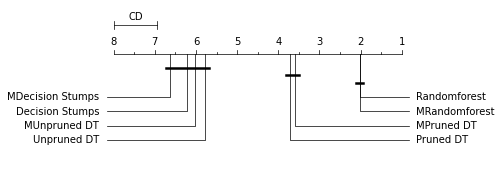

In [11]:
# convert the score list to a dataframe
df3 = DataFrame(scores_list3,columns=['MRandomforest', 'MUnpruned DT', 'MPruned DT', 'MDecision Stumps'])
comb_df = pd.concat([df1, df3], axis=1)

# using autorank to compare the algorithms
result = autorank(comb_df)
print(result)
plot_stats(result)

#### Paragraph

I combine the result data frames from Task 3 and Task 5 together and using `autorank` to compare these classifiers. The classifiers from Task 5 are named with an 'M' at the head, which denotes adding the normal multiplicative noise. From the plot of the result, it shows adding the normal multiplicative noise would not lead to any change in the mean rank order of the four classifiers, and no classifiers are performing significantly better or worse on the noise dataset than on the clean dataset as there is overlap between each pair of classifiers. However, the classifiers are performing in the opposite direction by adding additive noise and multiplicative noise. As for **Random Forest**, it performs better on the dataset with additive noise but performs worse on the dataset with multiplicative noise than on the clean dataset, while for **Pruned Decision Tree**, it performs worse on the dataset with additive noise but performs better on the dataset with multiplicative noise than on the clean dataset. I think this is because the additive noise is adding random noise to the original value, while the multiplicative noise is calculated by multiplying an unwanted noise to the original value, which changed the original value more and became noisier.

## Task 6

#### Coding

In [12]:
# label noise
flip = np.random.binomial(1, 0.05, y.shape).astype(bool)
y_flipped = np.where(flip, 1 - y, y)

scores_list4 = []

params = [{
    'max_depth': np.arange(2, 100), 
    #'criterion': ['entropy']
}]

for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, np.ravel(y_flipped), test_size = 0.2, random_state=seeds[iteration])
    score_list = []
    
    # Random Forest
    model1 = RandomForestClassifier()
    score1 = model1.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score1)

    # Unpruned Decision Tree
    model2 = DecisionTreeClassifier()
    score2 = model2.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score2)

    # Pruned Decision Tree
    #find the best max_depth by using GridSearchCV
    grid_search = GridSearchCV(model2, params, cv = 5)
    grid_search.fit(X_train, y_train)
    model3 = grid_search.best_estimator_
    score3 = model3.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score3)

    # Decision Stump
    model4 = DecisionTreeClassifier(max_depth=1)
    score4 = model4.fit(X_train, y_train).score(X_test, y_test)
    score_list.append(score4)

    scores_list4.append(score_list)

RankResult(rankdf=
                  meanrank     mean       std  ci_lower  ci_upper effect_size  \
Randomforest         1.545  0.66930  0.030699  0.662587  0.676013         0.0   
CRandomforest        2.600  0.64650  0.031330  0.639787  0.653213    0.735102   
Pruned DT            3.110  0.63875  0.028984  0.632037  0.645463    1.023313   
CPruned DT           4.975  0.60965  0.033995  0.602937  0.616363    1.841664   
Unpruned DT          5.245  0.60505  0.031555  0.598337  0.611763    2.063933   
Decision Stumps      5.790  0.59455  0.032186  0.587837  0.601263    2.376707   
CDecision Stumps     6.110  0.59195  0.030075  0.585237  0.598663    2.545367   
CUnpruned DT         6.625  0.58285  0.030849  0.576137  0.589563    2.809189   

                   magnitude  
Randomforest      negligible  
CRandomforest         medium  
Pruned DT              large  
CPruned DT             large  
Unpruned DT            large  
Decision Stumps        large  
CDecision Stumps       large  
CUn

/Users/yezi/opt/anaconda3/envs/venv/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

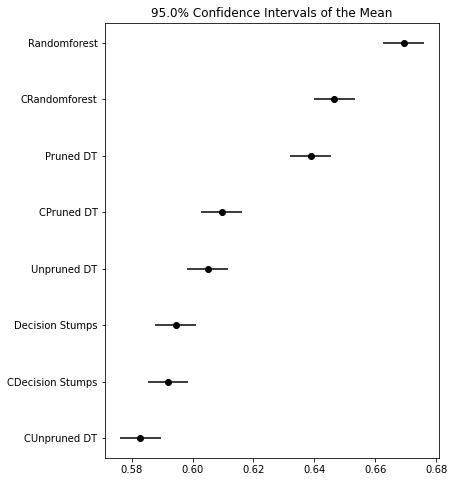

In [13]:
# convert the score list to a dataframe
df4 = DataFrame(scores_list4,columns=['CRandomforest', 'CUnpruned DT', 'CPruned DT', 'CDecision Stumps'])
comb_df = pd.concat([df1, df4], axis=1)

# using autorank to compare the algorithms
result = autorank(comb_df)
print(result)
plot_stats(result)

#### Paragraph

I combine the result data frames from Task 3 and Task 6 together and using `autorank` to compare these classifiers. The classifiers from Task 6 are named with a 'C' at the head denotes using the class noise. From the plot of the result, it shows flipping 5% of the labels to the other class changes the mean rank order of **Decision Stumps** to be higher than **Unpruned Decision Tree** and all the classifiers' performance is affected significantly by the class noise except **Decision Stumps** as there is overlapping only between **Decision Stumps** and **CDecision Stumps** classifier pair. All the four classifiers perform worse on the class noise dataset than the clean dataset. I think class noise affects the classifiers differently from feature noise because adding feature noise makes the changes to the value of explanatory variables, but using class noise changes the target value to the opposite value in this binary classification task which affects the accuracy score heavier to the predictive model.

## Task 7

#### Coding

In [14]:
scores_list5 = []

params = [{
    'max_depth': np.arange(2, 100), 
    #'criterion': ['entropy']
}]

for iteration in range(100):
    # split the clean dataset first
    X_train, X_test, y_train, y_test = train_test_split(X_clean, np.ravel(y), test_size = 0.2, random_state=seeds[iteration])
    
    ## add 20% multiplicative normal noise to the train set
    noise = np.random.normal(1, 0.2, np.shape(X_train))
    X_noise = np.multiply(X_train, noise)
    
    score_list = []
    
    # Random Forest
    model1 = RandomForestClassifier()
    score1 = model1.fit(X_noise, y_train).score(X_test, y_test)
    score_list.append(score1)

    # Unpruned Decision Tree
    model2 = DecisionTreeClassifier()
    score2 = model2.fit(X_noise, y_train).score(X_test, y_test)
    score_list.append(score2)

    # Pruned Decision Tree
    #find the best max_depth by using GridSearchCV
    grid_search = GridSearchCV(model2, params, cv = 5)
    grid_search.fit(X_noise, y_train)
    model3 = grid_search.best_estimator_
    score3 = model3.fit(X_noise, y_train).score(X_test, y_test)
    score_list.append(score3)

    # Decision Stump
    model4 = DecisionTreeClassifier(max_depth=1)
    score4 = model4.fit(X_noise, y_train).score(X_test, y_test)
    score_list.append(score4)

    scores_list5.append(score_list)

RankResult(rankdf=
                      meanrank  median       mad ci_lower ci_upper  \
TrainRandomforest        1.865   0.670  0.029652     0.66    0.685   
MRandomforest            2.065   0.670  0.029652    0.655    0.685   
MPruned DT               3.635   0.635  0.029652    0.625     0.66   
TrainPruned DT           4.125   0.635  0.037065    0.615    0.655   
TrainUnpruned DT         5.315   0.610  0.029652    0.595     0.63   
MUnpruned DT             6.025   0.600  0.033359     0.58    0.615   
TrainDecision Stumps     6.315   0.595  0.037065     0.58     0.61   
MDecision Stumps         6.655   0.595  0.029652     0.58    0.605   

                     effect_size   magnitude  
TrainRandomforest            0.0  negligible  
MRandomforest                0.0  negligible  
MPruned DT              1.180359       large  
TrainPruned DT          1.042791       large  
TrainUnpruned DT        2.023472       large  
MUnpruned DT            2.218018       large  
TrainDecision Stumps 

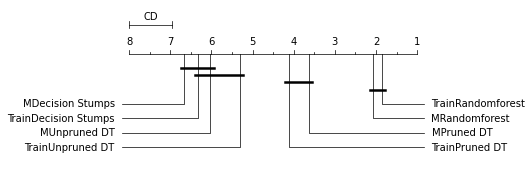

In [15]:
# convert the score list to a dataframe
df5 = DataFrame(scores_list5,columns=['TrainRandomforest', 'TrainUnpruned DT', 'TrainPruned DT', 'TrainDecision Stumps'])
comb_df5 = pd.concat([df3, df5], axis=1) #compare adding 20% normal multiplicative noise to the whole set (Task 5) and the training set

# using autorank to compare the algorithms
result = autorank(comb_df5)
print(result)
plot_stats(result)

In [16]:
scores_list6 = []

params = [{
    'max_depth': np.arange(2, 100), 
    #'criterion': ['entropy']
}]

for iteration in range(100):
    # split the clean dataset first
    X_train, X_test, y_train, y_test = train_test_split(X_clean, np.ravel(y), test_size = 0.2, random_state=seeds[iteration])
    
    ## add 20% multiplicative normal noise to the test set
    noise = np.random.normal(1, 0.2, np.shape(X_test))
    X_noise = np.multiply(X_test, noise)
    
    score_list = []
    
    # Random Forest
    model1 = RandomForestClassifier()
    score1 = model1.fit(X_train, y_train).score(X_noise, y_test)
    score_list.append(score1)

    # Unpruned Decision Tree
    model2 = DecisionTreeClassifier()
    score2 = model2.fit(X_train, y_train).score(X_noise, y_test)
    score_list.append(score2)

    # Pruned Decision Tree
    #find the best max_depth by using GridSearchCV
    grid_search = GridSearchCV(model2, params, cv = 5)
    grid_search.fit(X_train, y_train)
    model3 = grid_search.best_estimator_
    score3 = model3.fit(X_train, y_train).score(X_noise, y_test)
    score_list.append(score3)

    # Decision Stump
    model4 = DecisionTreeClassifier(max_depth=1)
    score4 = model4.fit(X_train, y_train).score(X_noise, y_test)
    score_list.append(score4)

    scores_list6.append(score_list)

RankResult(rankdf=
                     meanrank  median       mad ci_lower ci_upper effect_size  \
TestRandomforest        1.785  0.6725  0.025946     0.66    0.685         0.0   
MRandomforest           2.020  0.6700  0.029652    0.655    0.685    0.089733   
MPruned DT              3.630  0.6350  0.029652    0.625     0.66    1.345994   
TestPruned DT           4.065  0.6350  0.029652     0.62     0.65    1.345994   
TestUnpruned DT         5.445  0.6050  0.029652     0.59    0.625    2.422789   
MUnpruned DT            6.030  0.6000  0.033359     0.58    0.615    2.426148   
TestDecision Stumps     6.475  0.5925  0.033358     0.58     0.61    2.677129   
MDecision Stumps        6.550  0.5950  0.029652     0.58    0.605     2.78172   

                      magnitude  
TestRandomforest     negligible  
MRandomforest        negligible  
MPruned DT                large  
TestPruned DT             large  
TestUnpruned DT           large  
MUnpruned DT              large  
TestDecision 

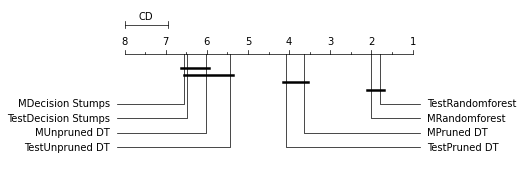

In [17]:
# convert the score list to a dataframe
df6 = DataFrame(scores_list6,columns=['TestRandomforest', 'TestUnpruned DT', 'TestPruned DT', 'TestDecision Stumps'])
comb_df7 = pd.concat([df3, df6], axis = 1)
#comb_df6 = pd.concat([comb_df5, df6], axis=1) #compare adding 20% normal multiplicative noise to the whole set (Task 5) and the training set and the test set

# using autorank to compare the algorithms
result = autorank(comb_df7)
print(result)
plot_stats(result)

/Users/yezi/opt/anaconda3/envs/venv/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

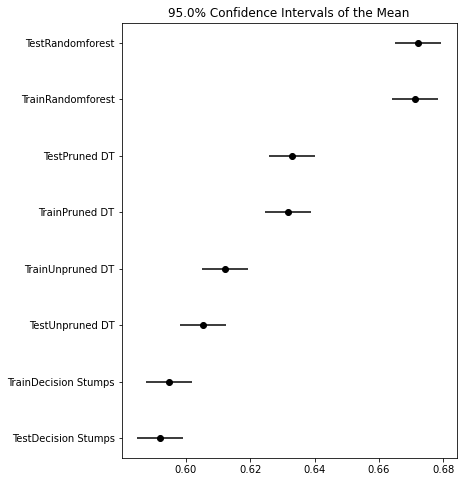

In [18]:
comb_df8 = pd.concat([df5, df6], axis = 1) #compare adding noise to training set and to test set

# using autorank to compare the algorithms
result = autorank(comb_df8)
plot_stats(result)

#### Paragraph

I combine the result data frames from Task 5 and Task 7 together, which both add 20% normal multiplicative noise to the dataset and use `autorank` to compare these classifiers. The classifiers named with a 'Train' at the head denotes adding noise to the training set, and a 'Test' at the head denotes adding noise to the testing set. From the plots of the result, both of them show adding 20% normal multiplicative noise before and after the training and testing data split does not change the mean rank order of the four classifiers but adding the 20% normal multiplicative noise before the training and testing data split is always worse than adding to the training set or test set after the data split except using **Pruned Decision Tree**, but all are not significant. By comparing the classifiers' performance of adding noise to the training set and the test set, I found **Random Forest** and **Pruned Decision Tree** are performing better on adding 20% multiplicative noise to the test set than add noise to the training set but **Unpruned Decision Tree** and **Decision Stumps** are performing better on adding 20% multiplicative noise to the training set than add noise to the test set; however, these are not statistically significant. 

## Task 8

#### Coding

In [19]:
def score(X, y):
    #for iteration in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.2, random_state=seeds[0])
    
    # Random Forest
    model1 = RandomForestClassifier()
    score1 = model1.fit(X_train, y_train).score(X_test, y_test)
        #scoreRF += score1

    # Unpruned Decision Tree
    model2 = DecisionTreeClassifier()
    score2 = model2.fit(X_train, y_train).score(X_test, y_test)
        #scoreUDT += score2

    # Pruned Decision Tree
    #find the best max_depth by using GridSearchCV
    params = [{
        'max_depth': np.arange(2, 100), 
        #'criterion': ['entropy']
    }]
    grid_search = GridSearchCV(model2, params, cv = 5)
    grid_search.fit(X_train, y_train)
    model3 = grid_search.best_estimator_
    score3 = model3.fit(X_train, y_train).score(X_test, y_test)
        #scorePDT += score3

    # Decision Stump
    model4 = DecisionTreeClassifier(max_depth=1)
    score4 = model4.fit(X_train, y_train).score(X_test, y_test)
        #scoreDS += score4
    
    return(score1, score2, score3, score4)

Add_lists = [] # additive normal noise result
Mul_lists = [] # multiplicative normal noise result
Cla_lists = [] # class noise result

for i in np.arange(0,1000,100):
    Add_list = [i]
    Mul_list = [i]
    
    noise = np.random.normal(0, i, np.shape(X_clean))
    # raise or lower the percentage of additive noise.
    X_addnoise = X_clean + np.multiply(noise, np.average(X_clean, axis = 0))
    RF, UDT, PDT, DS = score(X_addnoise, y)
    Add_list.append(RF)
    Add_list.append(UDT)
    Add_list.append(PDT)
    Add_list.append(DS)
    
    Add_lists.append(Add_list)
    
    # raise or lower the percentage of multiplicative noise.
    X_mulnoise = np.multiply(X_clean, noise)
    RF, UDT, PDT, DS = score(X_mulnoise, y)
    Mul_list.append(RF)
    Mul_list.append(UDT)
    Mul_list.append(PDT)
    Mul_list.append(DS)
    
    Mul_lists.append(Mul_list)

for i in np.arange(0,1.1,0.1):
    Cla_list = [i]
    
    # raise or lower the percentage of class noise.
    flip = np.random.binomial(1, i, y.shape).astype(bool)
    y_flipped = np.where(flip, 1-y, y)
    
    RF, UDT, PDT, DS = score(X_clean, y_flipped)
    Cla_list.append(RF)
    Cla_list.append(UDT)
    Cla_list.append(PDT)
    Cla_list.append(DS)
    
    Cla_lists.append(Cla_list)
    

Add_df = DataFrame(Add_lists,columns=['noise', 'Randomforest', 'Unpruned DT', 'Pruned DT', 'Decision Stumps'])
print(Add_df)

Mul_df = DataFrame(Mul_lists,columns=['noise', 'Randomforest', 'Unpruned DT', 'Pruned DT', 'Decision Stumps'])
print(Mul_df)

Cla_df = DataFrame(Cla_lists,columns=['noise', 'Randomforest', 'Unpruned DT', 'Pruned DT', 'Decision Stumps'])
print(Cla_df)

   noise  Randomforest  Unpruned DT  Pruned DT  Decision Stumps
0      0         0.720        0.625      0.675            0.645
1    100         0.615        0.565      0.605            0.565
2    200         0.570        0.555      0.590            0.595
3    300         0.520        0.495      0.510            0.545
4    400         0.530        0.555      0.520            0.470
5    500         0.490        0.440      0.495            0.485
6    600         0.500        0.505      0.570            0.530
7    700         0.520        0.520      0.535            0.525
8    800         0.465        0.535      0.500            0.485
9    900         0.480        0.520      0.510            0.500
   noise  Randomforest  Unpruned DT  Pruned DT  Decision Stumps
0      0         0.460        0.460      0.460            0.460
1    100         0.495        0.540      0.520            0.450
2    200         0.465        0.530      0.495            0.470
3    300         0.475        0.485     

#### Paragraph

I have tried applying the size from range 0% to 100000% with a step size of 10000% to normal additive noise and normal multiplicative noise to the features in the clean dataset and output the accuracy score as data frames. Assume the classifier can tolerate an accuracy score higher than 50% and start to break when the accuracy score is lower than 50%. From the data frames, I found **Random Forest** and **Pruned Decision Tree** classifiers can tolerate 40000% normal additive noise and start to break at 50000%, but **Unpruned Decision Tree** classifier can tolerate 20000% normal additive noise and start to break at 30000% and **Decision Stumps** can tolerate 30000% and start to break at 40000%. All the classifiers start to break at 0% normal multiplicative noise. I have also tried applying 0% to 100% flip of the class label in the clean dataset and output the accuracy score as another data frame. I found **Random Forest** can tolerate 30% class noise and start to break at 40% but **Unpruned Decision Tree** and **Pruned Decision Tree** can only tolerate 20% class noise and start to break at 30%. **Decision Stumps** can tolerate 40% class noise and start to break at 50%.

## EOF